# Clustering

In this assignment, you will implement a K-Means Clustering algorithm from scratch and compare the results to existing sklearn algorithm.


In [22]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


Question 1.1: Write a method that determine Labels from Points and ClusterCentroids, and return a list of a label for each point


In [23]:
def DistanceBetweenPoints(PointA, PointB):
  """
  MH: I'm adding this function for the ease of calculation between two points. It just calculates the Euclidean distance
  between two points.
  """
  Difference = PointA - PointB
  DifferenceSq = np.square(Difference)
  SumOfSquares = np.sum(DifferenceSq)
  return np.sqrt(SumOfSquares)

In [24]:
def FindLabelOfClosest(Points, ClusterCentroids):
    """
    Determine Labels from Points and ClusterCentroids

    MH: A little guessing of what are the expected types in this case.

    Both look like pandas dataframes, both of them having the same amount of dimensions.
    In Points each row is an object, in ClusterCentroids each row is a centroid of
    the particular cluster.
    """

    # MH: Number of clusters is the number of centroids, dimensions is the length of a single vector.
    NumberOfClusters, NumberOfDimensions = ClusterCentroids.shape
    # print(f"Number of clusters: {NumberOfClusters}")
    # MH: Extracting the number of points, not sure why we need number of Dimensions.
    NumberOfPoints, NumberOfDimensions = Points.shape
    # print(f"Number of points: {NumberOfPoints}")

    # MH: This is the result of the operation. Each row is just a number of the label
    Labels = pd.DataFrame(columns=["Label"], index=Points.index)

    # We're going through every point.
    for PointNumber in range(NumberOfPoints):
        # Obtaining the point here.
        Point = Points.iloc[PointNumber]
        # print(f"Point number: {PointNumber}, point is {Point}")

        # MH: I'm putting the distances here. Each row has only one column that represents
        # the euclidean distance of a point to particular cluster.
        Distances = pd.DataFrame(columns=["Distance"], index=range(NumberOfClusters))

        # We're going through every cluster.
        for ClusterNumber in range(NumberOfClusters):
            # Extract the centroid
            Centroid = ClusterCentroids.iloc[ClusterNumber]

            # Calculate the sqrt to have the Euclidean distance
            CalculatedDistance = DistanceBetweenPoints(Point, Centroid)
            Distances.iloc[ClusterNumber] = CalculatedDistance

        # Get the label of the closes for each of the point
        Labels.iloc[PointNumber] = Distances.idxmin()

    return Labels  # return the a label for each point

Question 1.2: Write a method that determine centroid of Points with the same label


In [25]:
def CalculateClusterCentroid(Points, Labels):
    """
    Determine centroid of Points with the same label
    """

    # Extracting all the labels, so effectively the numbers.
    ClusterLabels = np.unique(Labels["Label"])

    # This is just an empty dataframe. Each row represents another label.
    ClusterCentroids = pd.DataFrame(columns=Points.columns, index=ClusterLabels)
    # display(ClusterCentroids)

    # for each cluster
    for ClusterNumber in ClusterLabels:
        # MH: Filter out the labels dataframe to have the particular label only.
        ClusterNumberRows = Labels[Labels["Label"] == ClusterNumber]
        # display(ClusterNumberRows)

        # MH: Filter the Points so that we only have that particular label, i.e. the same index values
        FilteredPoints = Points.loc[ClusterNumberRows.index]

        # Centroid is just a mean in this case.
        ClusterCentroids.iloc[ClusterNumber] = FilteredPoints.mean()

    # return the a label for each point
    return ClusterCentroids

Question 1.3: Put it all together as such. K-means algorithm partitions the input data into K clusters by iterating between the following two steps:

- Compute the cluster center by computing the arithmetic mean of all the points belonging to the cluster.
- Assign each point to the closest cluster center.


In [26]:
def KMeans(Points, ClusterCentroidGuesses):
    ClusterCentroids = ClusterCentroidGuesses.copy()

    # Start with empty dataframe for labels, so that the comparison works fine.
    Labels_Previous = pd.DataFrame(columns=["Labels"])

    # Get starting set of labels
    Labels = FindLabelOfClosest(Points, ClusterCentroids)

    # We're repeating until the centroids are stable.
    while not np.array_equal(Labels, Labels_Previous):
        # Re-calculate cluster centers based on new set of labels
        ClusterCentroids = CalculateClusterCentroid(Points, Labels)

        # Store the labels for the comparison.
        Labels_Previous = Labels.copy()

        # Determine new labels based on new cluster centers
        Labels = FindLabelOfClosest(Points, ClusterCentroids)

    return Labels, ClusterCentroids

In [27]:
StoreTxn = pd.read_csv("./Superstore Transaction data.csv")
StoreTxn["Order Date"] = pd.to_datetime(StoreTxn["Order Date"])
StoreTxn.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,6,CA-2014-115812,2014-06-09,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
6,7,CA-2014-115812,2014-06-09,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656
7,8,CA-2014-115812,2014-06-09,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152
8,9,CA-2014-115812,2014-06-09,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825
9,10,CA-2014-115812,2014-06-09,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700


Extract RFM features from the transaction data:

- Recency: when was the last purchase they made
- Frequency: how often do they make a purchase in the last month (or any given window you choose)
- Monetary: how much money did they spend in the last month


Question 2.1:

- Use groupby to summarize the quantity and dollar columns by user_id and date
- Name the aggregated data txn_agg
- Reset the index for txn_agg to the default and user_id and date to dataframe columns
- Confirm changes


In [28]:
# I just filtered throught the data.
quantity_columns = ["Sales", "Quantity", "Profit"]
index_columns = ["Customer ID", "Order Date"]

txn_agg = (
    StoreTxn[index_columns + quantity_columns]
    .groupby(by=["Customer ID", "Order Date"])
    .sum()
)
txn_agg.reset_index(inplace=True)
txn_agg.head(10)

,Customer ID,Order Date,Sales,Quantity,Profit
0,AA-10315,2014-03-31,726.548,4,267.4224
1,AA-10315,2014-09-15,29.500,5,13.2826
2,AA-10315,2015-10-04,26.960,2,7.0096
3,AA-10315,2016-03-03,4406.072,14,-747.1021
4,AA-10315,2017-06-29,374.480,5,96.5050
5,AA-10375,2014-04-21,16.520,5,5.5755
6,AA-10375,2014-10-24,34.272,3,11.1384
7,AA-10375,2015-02-03,178.370,5,62.0658
8,AA-10375,2015-05-08,5.248,2,0.5904
9,AA-10375,2015-11-13,84.960,6,6.3720


Question 2.2:Using the aggregated data, obtain recency, frequency and monetary features for both dollar and quantity. Use a 7-day moving window for frequency and monetary. Call your new features last_visit_ndays (recency) quantity_roll_sum_7D (frequency) and dollar_roll_sum_7D (monetary)


In [29]:
"""
# Recency

Let's find the most recent date in the dataset to have a good relative point.
"""

# Starting with limiting the aggregated dataset to the Order Date only, so we're not going to have any
# weird mixups with aggregation. Filter it to just have the latest order, we're picking up recency after all.
latest_transaction_by_customer = (
    txn_agg[["Customer ID", "Order Date"]]
    .groupby(by=["Customer ID"])
    .max()
    .reset_index()
)
# display(latest_transaction_by_customer.head())

# This is the latest transaction in the whole dataset. It's for making sure that the lowest value is going to be 0.
latest_date_in_the_dataset = latest_transaction_by_customer["Order Date"].max()
print(f"Latest transaction date: {latest_date_in_the_dataset:%Y-%m-%d}")

# Difference column, and extract the days part to get the number part.
latest_transaction_by_customer["last_visit_ndays"] = (
    latest_date_in_the_dataset - latest_transaction_by_customer["Order Date"]
).dt.days
# display(latest_transaction_by_customer.head())

# Finally, let's drop the Order Date column and rename to `last`, to have the consistency.
last = latest_transaction_by_customer.drop(columns=['Order Date'], axis=1)
display(last.head())

Latest transaction date: 2017-12-30


,Customer ID,last_visit_ndays
0,AA-10315,184
1,AA-10375,19
2,AA-10480,259
3,AA-10645,55
4,AB-10015,415


In [30]:
"""
# Frequency

The initial comments call for making rolling averages over 7 days. The data is pretty sparse though, it might make more 
sense to have it over another window.

To pick the window let's take another approach at the frequency. I'm wondering what's the distribution of number of 
days between the transactions per customer. It can give us a good indicator on what is the window that we should pick 
for the rolling average of the transactions and sales.
"""

# Again, let's start by filtering the columns to have only the order date.
dates_only = txn_agg[["Customer ID", "Order Date"]].set_index(["Customer ID"])
# display(dates_only.head(10))

# Let's calculate the differences between the days.
# Let's also drop NAs, we're only interested in days between the purchases.
day_diffs = dates_only.groupby(["Customer ID"]).diff().dropna()
# display(day_diffs.head(10))

# Convert the deltas to days for more natural calculation. Drop Order Date, since it's misleading now.
day_diffs["Day count"] = day_diffs["Order Date"].dt.days
day_diffs.drop(["Order Date"], axis=1, inplace=True)
# display(day_diffs.head(10))

# Find the average number of days per customer.
average_number_of_days_between_purchases = day_diffs.mean()["Day count"]
print(
    f"The average number of days between purchases is {average_number_of_days_between_purchases:.2f}"
)

# The amount of days between purchases is on average 180 days, so ~6 months. I can take a deeper look at the distribution
# of the dates or I can just take 3-months rolling average.

roll = (
    txn_agg.groupby(by="Customer ID")
    .rolling(window="180D", on="Order Date")
    .sum()
    .reset_index("Customer ID")
    .drop(["Order Date", "Profit"], axis=1)
    .groupby("Customer ID")
    .mean()
    .rename(
        columns={"Quantity": "Quantity_roll_sum_180D", "Sales": "Sales_roll_sum_180D"},
    )
    .reset_index()
)
display(roll.head(10))


The average number of days between purchases is 188.79


,Customer ID,Quantity_roll_sum_180D,Sales_roll_sum_180D
0,AA-10315,7.200000,1263.413600
1,AA-10375,6.444444,149.184444
2,AA-10480,13.000000,595.008000
3,AA-10645,15.166667,1261.691667
4,AB-10015,5.000000,299.593333
5,AB-10060,12.500000,1104.012750
6,AB-10105,15.800000,3844.039800
7,AB-10150,8.800000,214.722000
8,AB-10165,11.500000,263.134750
9,AB-10255,8.333333,146.288222


Question 2.3: Combine all three features into a single DataFrame and call it txn_roll


In [31]:
txn_roll = pd.merge(last, roll, on='Customer ID', how="inner").set_index('Customer ID')
display(txn_roll.head())


,last_visit_ndays,Quantity_roll_sum_180D,Sales_roll_sum_180D
Customer ID,,,
AA-10315,184,7.200000,1263.413600
AA-10375,19,6.444444,149.184444
AA-10480,259,13.000000,595.008000
AA-10645,55,15.166667,1261.691667
AB-10015,415,5.000000,299.593333


Question 2.4: Use fillna to replace missing values for recency with a large value like 100 days (whatever makes business sense). HINT: You can use pd.Timedelta('100 days') to set the value.


In [32]:
'''
I changed the way it works a little. The recency is already filled, and I aggregated it even further.
Just skipping this step, the NAs are guaranteed through with previous steps.
'''

'\nI changed the way it works a little. The recency is already filled, and I aggregated it even further.\nJust skipping this step, the NAs are guaranteed through with previous steps.\n'

Question 2.5: Merge the aggregated data churn_agg with the RFM features in churn_roll. You can use the merge method to do this with the right keys specified.


In [33]:
'''
I don't think I need to merge it here either. I prepared RFM features for the whole customer's database, and I'm going to 
run k-Means algorithm to cluster the customers into groups.
'''

"\nI don't think I need to merge it here either. I prepared RFM features for the whole customer's database, and I'm going to \nrun k-Means algorithm to cluster the customers into groups.\n"

Question 3.1: Train the k-means algorithm you developed earlier on the RFM features using 𝑘=4 . What are the cluster centroids? The cluster centroids should be reported in the original scale, not the standardized scale.


In [34]:
# Since we're working with different scales, the Euclidean difference will be greatly skewed. Let me standardize the
# features so that there is no one feature that affects the distance in a significant way.
scaler = StandardScaler()

standardized = pd.DataFrame(columns=txn_roll.columns, index=txn_roll.index)
standardized[txn_roll.columns] = scaler.fit_transform(txn_roll)

# display(standardized.head())

# MH: Let's just set random points as centroids. We're not replacing to avoid having the same centroid and end up in a
# "deadlock."
ClusterCentroidGuesses = (
    standardized.sample(4, replace=False).reset_index().drop("Customer ID", axis=1)
)

# Display standardized values
# display(ClusterCentroidGuesses)

# Display de-standardized values
DestandardizedCentroidGuesses = pd.DataFrame(columns=txn_roll.columns)
DestandardizedCentroidGuesses[txn_roll.columns] = scaler.inverse_transform(
    ClusterCentroidGuesses
)
print("Initial centroids")
display(DestandardizedCentroidGuesses)

# Here's some testing of the functions before runnint the proper KMeans algorithm
Point = standardized.iloc[0, :]
# display(Point)

Centroid = ClusterCentroidGuesses.iloc[0]
# display(Centroid)

# test_distance = DistanceBetweenPoints(Point, Centroid)
# print(f"Distance: {test_distance}")

# test_labels = FindLabelOfClosest(standardized, ClusterCentroids=ClusterCentroidGuesses)
# test_centroids = CalculateClusterCentroid(standardized, test_labels)
# display(test_centroids)

Labels, ClusterCentroids = KMeans(standardized, ClusterCentroidGuesses)
DestandardizedFinalCentroids = pd.DataFrame(columns=txn_roll.columns)
DestandardizedFinalCentroids[txn_roll.columns] = scaler.inverse_transform(ClusterCentroids)

print("Final centroids")
display(DestandardizedFinalCentroids)

Initial centroids


,last_visit_ndays,Quantity_roll_sum_180D,Sales_roll_sum_180D
0,8.0,12.000000,512.057500
1,20.0,22.142857,757.827143
2,37.0,14.100000,942.900000
3,85.0,15.444444,358.171111


Final centroids


,last_visit_ndays,Quantity_roll_sum_180D,Sales_roll_sum_180D
0,91.096354,8.825064,452.835411
1,69.392453,17.014959,911.617220
2,176.325000,19.423222,2960.241200
3,538.375000,10.786455,561.375582


Question 3.2: Pick few pairs and plot scatter plots along with cluster centroids.


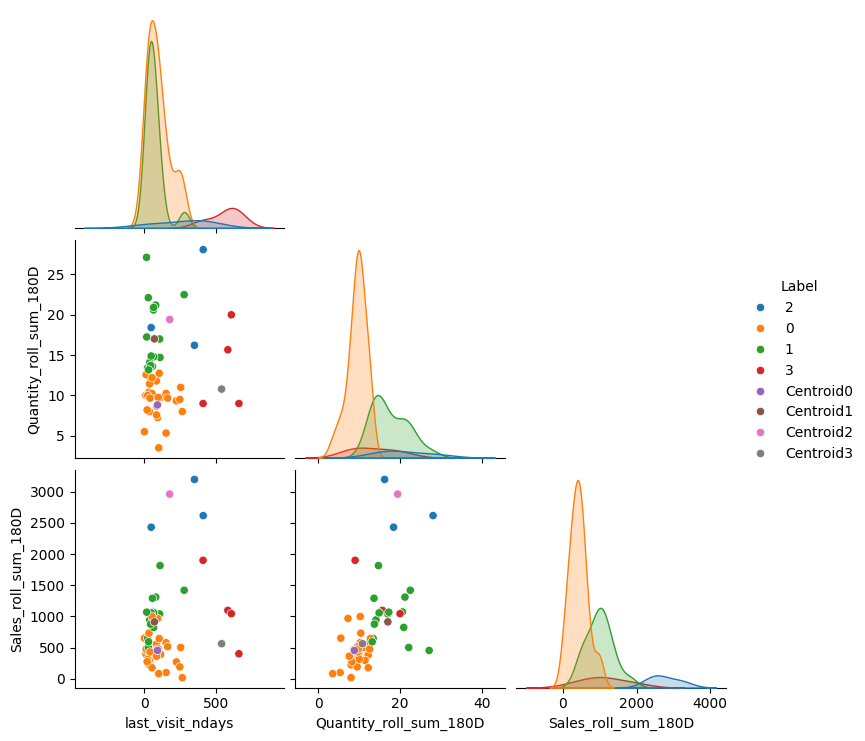

In [35]:
# display(Labels.head())
# display(txn_roll.head())
CentroidLabels = pd.DataFrame({'Label': [f"Centroid{n}" for n in range(DestandardizedFinalCentroids.shape[0])]})
LabeledCentroids = pd.merge(DestandardizedFinalCentroids, CentroidLabels, left_index=True, right_index=True)

merged = pd.merge(txn_roll, Labels, on='Customer ID')
sns.pairplot(pd.concat([merged.sample(50), LabeledCentroids]), hue='Label', corner=True)


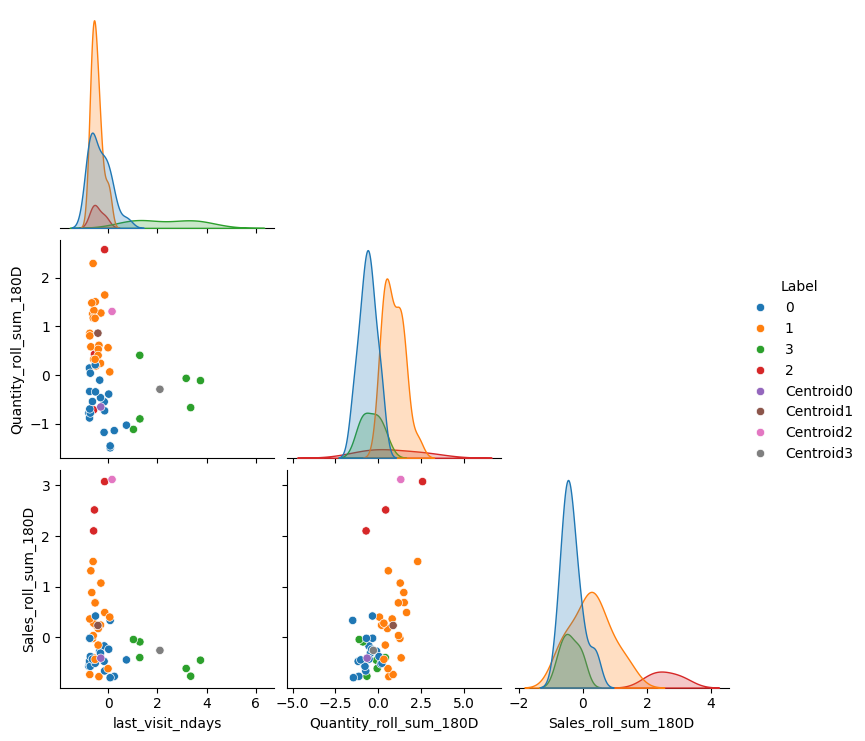

In [36]:
# display(Labels.head())
# display(txn_roll.head())
CentroidLabels = pd.DataFrame({'Label': [f"Centroid{n}" for n in range(ClusterCentroids.shape[0])]})
LabeledCentroids = pd.merge(ClusterCentroids, CentroidLabels, left_index=True, right_index=True)

merged = pd.merge(standardized, Labels, on='Customer ID')
sns.pairplot(pd.concat([merged.sample(50), LabeledCentroids]), hue='Label', corner=True)


[Bonus] Question 4: Train k-means model using sklearn library and compare results to the model developed above.


In [38]:
from sklearn.cluster import KMeans as SklearnKMeans

SklearnModel = SklearnKMeans(n_clusters=4)
SklearnModel.fit(standardized)

print("Created by Sklearn")
display(
    pd.DataFrame(
        scaler.inverse_transform(SklearnModel.cluster_centers_),
        columns=standardized.columns,
    )
    .sort_values(by="last_visit_ndays")
    .reset_index(drop=True)
)

print("Created by me")
display(
    DestandardizedFinalCentroids.sort_values(by="last_visit_ndays").reset_index(
        drop=True
    )
)

Created by Sklearn


,last_visit_ndays,Quantity_roll_sum_180D,Sales_roll_sum_180D
0,70.205993,17.031909,931.128179
1,90.989637,8.849718,453.026481
2,182.111111,19.755741,3066.598989
3,538.375000,10.786455,561.375582


Created by me


,last_visit_ndays,Quantity_roll_sum_180D,Sales_roll_sum_180D
0,69.392453,17.014959,911.617220
1,91.096354,8.825064,452.835411
2,176.325000,19.423222,2960.241200
3,538.375000,10.786455,561.375582


Question 5: Create a new text cell in your Notebook: Complete a 50-100 word summary (or short description of your thinking in applying this week's learning to the solution) of your experience in this assignment. Include: What was your incoming experience with this model, if any? what steps you took, what obstacles you encountered. how you link this exercise to real-world, machine learning problem-solving. (What steps were missing? What else do you need to learn?) This summary allows your instructor to know how you are doing and allot points for your effort in thinking and planning, and making connections to real-world work.


I had been working with k-Means in the past, including during my undergraduate studies. I had usually worked in smaller datasets and I was actually able to implenent it with Microsoft Excel spreadsheets. This exercise was incredibly fun, although the dataframe explanations were a little difficult to follow.

In particular, I wasn't really sure what were the primary objects that needed classification. While the original dataset worked with transactions, everything was pointing at the customer as the primary object. I had to improvise a little to make sure that each object is a customer.

It was also great to see that my solution is pretty close to the one provided by sklearn, with the main suspect being different initial clusters.